# Packages

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
import projectfunctions as pf

# Read Performance Data

In [18]:
heap_id = pf.read_list('heapsort_id')
heap_mass = pf.read_list('heapsort_mass')
heap_name = pf.read_list('heapsort_name')
heap_reclat = pf.read_list('heapsort_reclat')
heap_reclong = pf.read_list('heapsort_reclong')
heap_year = pf.read_list('heapsort_year')

merge_id = pf.read_list('mergesort_id')
merge_mass = pf.read_list('mergesort_mass')
merge_name = pf.read_list('mergesort_name')
merge_reclat = pf.read_list('mergesort_reclat')
merge_reclong = pf.read_list('mergesort_reclong')
merge_year = pf.read_list('mergesort_year')

quick_id = pf.read_list('quicksort_id')
quick_mass = pf.read_list('quicksort_mass')
quick_name = pf.read_list('quicksort_name')
quick_reclat = pf.read_list('quicksort_reclat')
quick_reclong = pf.read_list('quicksort_reclong')
quick_year = pf.read_list('quicksort_year')

stable_id = pf.read_list('stablesort_id')
stable_mass = pf.read_list('stablesort_mass')
stable_name = pf.read_list('stablesort_name')
stable_reclat = pf.read_list('stablesort_reclat')
stable_reclong = pf.read_list('stablesort_reclong')
stable_year = pf.read_list('stablesort_year')

## QQ Plot

Looking just at heap sort values, we can see that the distributions vary considerably and are not normally distributed.

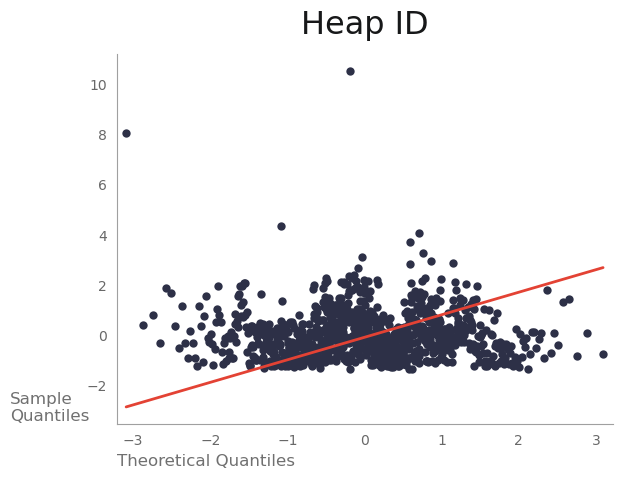

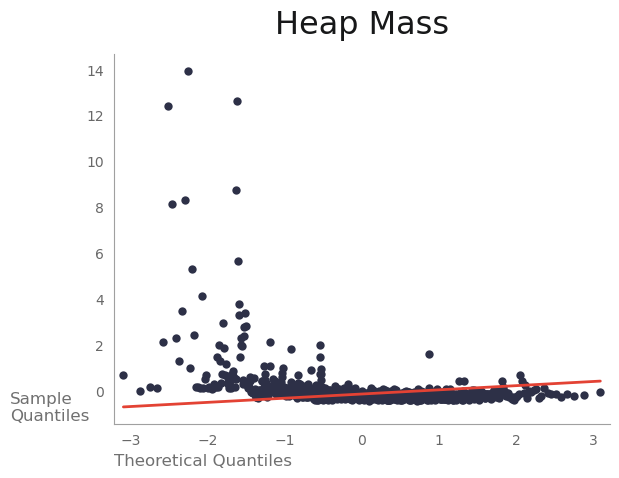

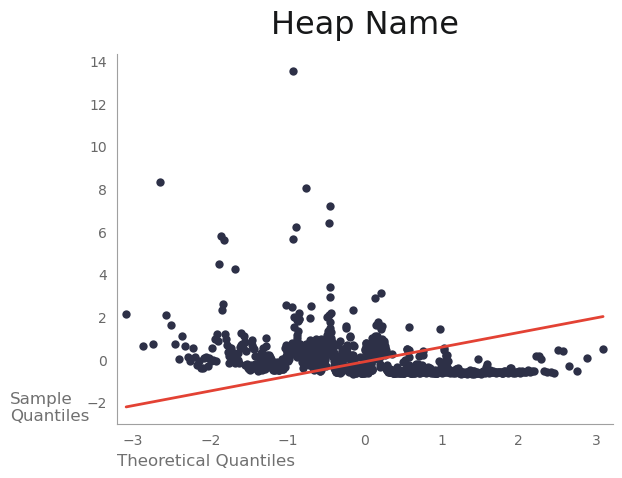

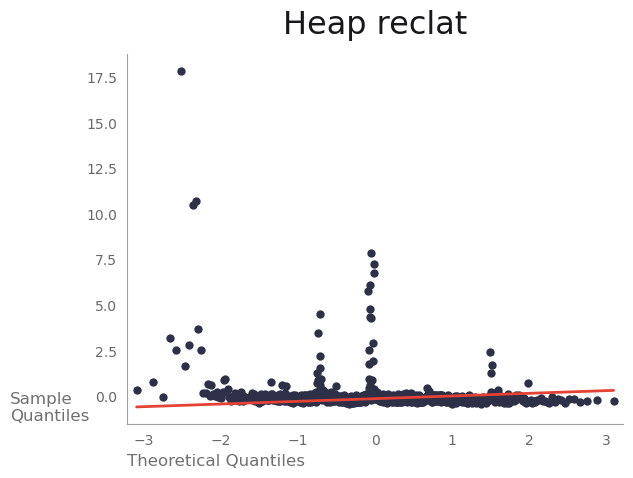

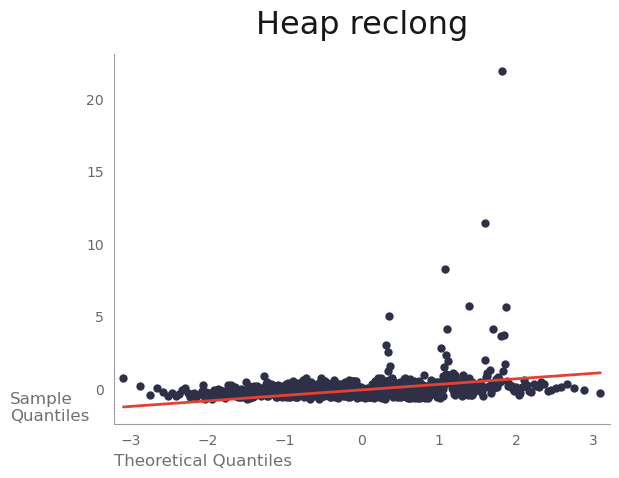

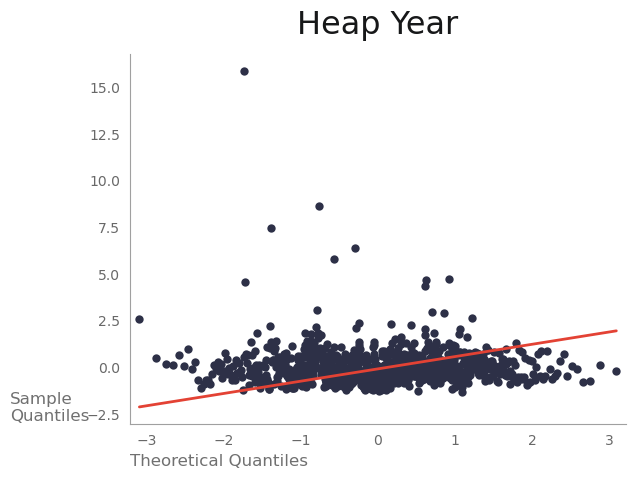

In [3]:
pf.qqplot(heap_id, 'Heap ID')
pf.qqplot(heap_mass, 'Heap Mass')
pf.qqplot(heap_name, 'Heap Name')
pf.qqplot(heap_reclat, 'Heap reclat')
pf.qqplot(heap_reclong, 'Heap reclong')
pf.qqplot(heap_year, 'Heap Year')

# Stats Prep

In [31]:
id_sum = pd.concat([heap_id, merge_id, quick_id, stable_id])
mass_sum = pd.concat([heap_mass, merge_mass, quick_mass, stable_mass])
name_sum = pd.concat([heap_name, merge_name, quick_name, stable_name])
reclat_sum = pd.concat([heap_reclat, merge_reclat, quick_reclat, stable_reclat])
reclong_sum = pd.concat([heap_reclong, merge_reclong, quick_reclong, stable_reclong])
year_sum = pd.concat([heap_year, merge_year, quick_year, stable_year])

exception_sum = pd.concat([mass_sum, name_sum, reclat_sum, reclong_sum, year_sum])

columns = pd.DataFrame([])
columns['id'], columns['mass'], columns['name'], columns['reclat'], columns['reclong'], columns['year'] = id_sum, mass_sum, name_sum, reclat_sum, reclong_sum, year_sum
# Z-Score Normalization
# https://www.geeksforgeeks.org/data-normalization-with-pandas/
for column in columns.columns: 
    columns[column] = (columns[column] -
                           columns[column].mean()) / columns[column].std()

exception_sum_z = pd.concat([columns['mass'], columns['name'], columns['reclat'], columns['reclong'], columns['year']])

id = pd.DataFrame([])
id['heap'], id['merge'], id['quick'], id['stable'] = heap_id, merge_id, quick_id, stable_id
id['mean'] = id.mean(axis = 1)

mass = pd.DataFrame([])
mass['heap'], mass['merge'], mass['quick'], mass['stable'] = heap_mass, merge_mass, quick_mass, stable_mass
mass['mean'] = mass.mean(axis = 1)

name = pd.DataFrame([])
name['heap'], name['merge'], name['quick'], name['stable'] = heap_name, merge_name, quick_name, stable_name
name['mean'] = name.mean(axis = 1)

reclat = pd.DataFrame([])
reclat['heap'], reclat['merge'], reclat['quick'], reclat['stable'] = heap_reclat, merge_reclat, quick_reclat, stable_reclat
reclat['mean'] = reclat.mean(axis = 1)

reclong = pd.DataFrame([])
reclong['heap'], reclong['merge'], reclong['quick'], reclong['stable'] = heap_reclong, merge_reclong, quick_reclong, stable_reclong
reclong['mean'] = reclong.mean(axis = 1)

year = pd.DataFrame([])
year['heap'], year['merge'], year['quick'], year['stable'] = heap_year, merge_year, quick_year, stable_year
year['mean'] = year.mean(axis = 1)

# Stats Tests
## First Hypothesis

In [60]:
# https://stackoverflow.com/a/29763653/13801562
pf.F_2samp_var_data(data1 = list(columns['id']), data2 = exception_sum_z[0], alternative = 'less')

(1.098081718757831, 0.5693995217539545)

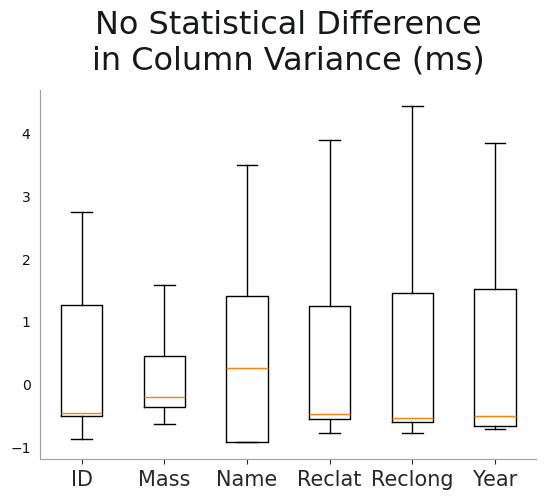

In [69]:
# comparisons = [hashcomp, dictcomp]
labels = ['ID', 'Mass', 'Name', 'Reclat', 'Reclong', 'Year']
fig, ax = plt.subplots()
ax.boxplot(columns, 0, '', labels = labels)
ax.set_title('No Statistical Difference\nin Column Variance (ms)', fontsize = 23,
			 pad = 15).set_color('#171819')
for pos in ['right', 'top']:
	plt.gca().spines[pos].set_visible(False)
ax.spines['bottom'].set_color('#A0A0A0')
ax.spines['left'].set_color('#A0A0A0')
ax.tick_params(axis = 'x', colors = '#282828', labelsize = 15)
ax.tick_params(axis = 'y', which = 'both', right = False,
				left = False, colors = '#101010')
plt.show();

The two-sample F-test shows that the variability of the _id_ column is nearly identical to the variability found in the sum of the other columns with $\alpha = 0.569$. This is also visible in the boxplot. As a result, we fail to reject the null hypothesis.

## Second Hypothesis